In [1]:
%matplotlib widget
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import numpy as np
from IPython import display


In [2]:
# BoE Interest rate history source - https://www.bankofengland.co.uk/boeapps/database/Bank-Rate.asp
# Consumer Price Index History Annual rate source - https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/l55o/mm23
url = "https://www.bankofengland.co.uk/boeapps/database/Bank-Rate.asp"
tables_cpih = pd.read_html(url, attrs={'id': 'stats-table'})[0]
tables_cpih["Date Changed"] = pd.to_datetime(tables_cpih["Date Changed"], format="%d %b %y")
tables_cpih.head()

,Date Changed,Rate
0,2023-08-03,5.25
1,2023-06-22,5.00
2,2023-05-11,4.50
3,2023-03-23,4.25
4,2023-02-02,4.00


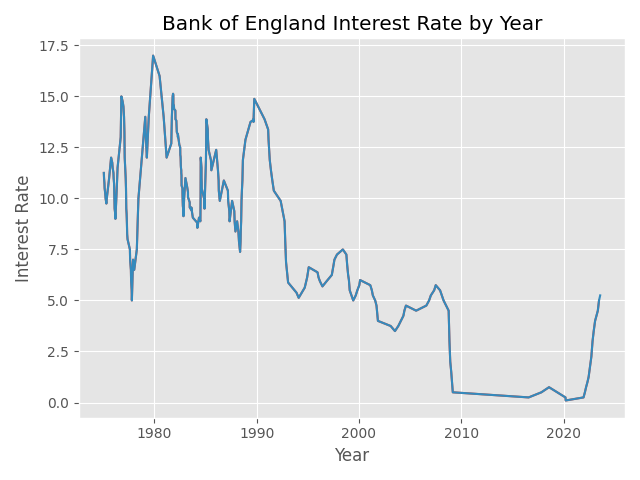

In [9]:
x = tables_cpih["Date Changed"]
y = tables_cpih["Rate"]

plt.clf

plt.style.use('ggplot')
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.title('Bank of England Interest Rate by Year')
plt.tight_layout()
plt.show()

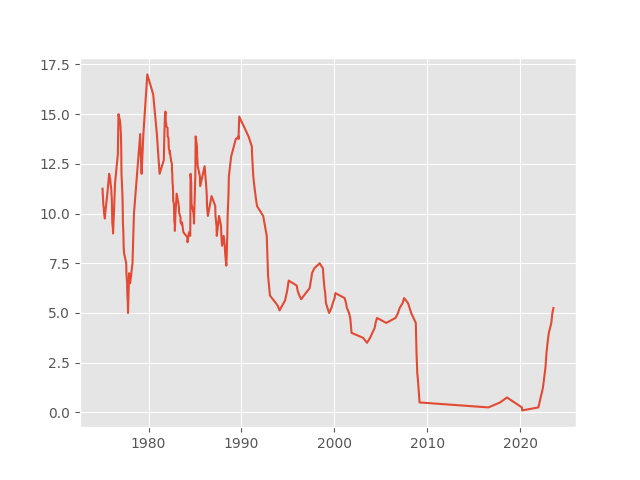

In [10]:
plt.clf()

fig, ax = plt.subplots()

xdata, ydata, = [], []
line, = ax.plot('Date Changed', 'Rate', data=tables_cpih)

def animate2(i):
    xdata.append(x.iat[-i - 1])
    ydata.append(y.iat[-i - 1])
    line.set_data(xdata, ydata)
    return line,

ani = animation.FuncAnimation(fig, animate2, frames=251, interval=20,  cache_frame_data=False, repeat=False)

plt.show()